In [183]:
import pandas as pd
from pandasql import sqldf

In [311]:
df = pd.read_csv("dataset_eda.csv")
df.head(10)

,user_id,fecha_de_instalacion,plataforma,fav_articulos,articulos_visitados,compras,busquedas,preguntas,sexo,edad,provincia,localidad,abandona
0,eb762ec824879652ef2cb69efde14017,2019-04-30 19:29:34,Android,1,2,0,1,1,masculino,17,Santa Cruz,Río Gallegos,0
1,987dc68c05f86e0e7c9f16378de9b2d8,2019-04-26 16:07:40,Android,2,1,0,2,2,femenino,20,Cordoba,Villa Carlos Paz,1
2,7cddf00b469f860d0e64d621c1e51f01,2019-04-28 21:13:43,Android,5,6,0,2,5,femenino,17,Buenos Aires,Don Torcuato,0
3,93ecb31820c022f12390064218fc57b8,2019-04-29 06:00:57,Android,35,46,4,10,12,masculino,20,Buenos Aires,Florencio Varela,0
4,0d75650b8934909f48f0e27622803bf0,2019-04-30 21:43:22,Android,1,0,0,1,1,femenino,17,Cordoba,NaN,1
5,9a8bf5542ddac215b46b64b7b84355fc,2019-04-28 14:37:08,Android,1,1,0,4,1,femenino,20,Buenos Aires,Gonzalez Catan,1
6,f19ae5a333252dcea0d8687c485e0f31,2019-05-03 18:48:36,Android,4,4,0,2,3,femenino,17,Buenos Aires,Moron,1
7,1ab6982751c0db6e19430ae589fa7671,2019-04-28 15:48:33,Android,2,4,0,1,1,masculino,17,Buenos Aires,Mariano Acosta,0
8,8471c772f2ac283594512507c5c088a1,2019-05-03 18:31:59,Android,18,27,0,4,7,femenino,20,Buenos Aires F.D.,Buenos Aires,1
9,94ddc234197cd065224d118e8036f34c,2019-05-02 06:51:09,Android,114,115,6,9,17,femenino,20,Salta,Salta,0


In [312]:
df.count()

user_id                 15966
fecha_de_instalacion    15966
plataforma              15966
fav_articulos           15966
articulos_visitados     15966
compras                 15966
busquedas               15966
preguntas               15966
sexo                    15966
edad                    15966
provincia               15487
localidad               15048
abandona                15966
dtype: int64

In [313]:
max(df.fecha_de_instalacion)

'2019-05-04 00:04:57'

In [314]:
min(df.fecha_de_instalacion)

'2019-04-26 00:05:46'

In [315]:
len(df.user_id.unique())

14838

In [316]:
dfm = df.copy()
dfm.drop_duplicates(subset ="user_id", keep = False, inplace = True) 
len(dfm)

13714

## Churn rate by day

In [317]:
dfm.fecha_de_instalacion = pd.to_datetime(dfm.fecha_de_instalacion)
dfm['day'] = (dfm.fecha_de_instalacion.dt.floor('d'))

by_day = (dfm.groupby('day')
.agg({'user_id':'count','abandona':'sum'})
.rename_axis("day")
.reset_index())
by_day['ch_rate'] = by_day.abandona/by_day.user_id
by_day

,day,user_id,abandona,ch_rate
0,2019-04-26,1620,1620,1.000000
1,2019-04-27,1981,1068,0.539122
2,2019-04-28,1672,835,0.499402
3,2019-04-29,1742,921,0.528703
4,2019-04-30,1601,812,0.507183
5,2019-05-01,1559,800,0.513149
6,2019-05-02,1618,822,0.508035
7,2019-05-03,1910,1038,0.543455
8,2019-05-04,11,2,0.181818


In [318]:
print("Ratio de abandono:"+ str(dfm.abandona.sum()/dfm.user_id.count()))

Ratio de abandono:0.5773661951290652


In [319]:
dfm = dfm[dfm.fecha_de_instalacion >= '2019-04-27']
dfm.reset_index(drop=True)
len(dfm)

12094

In [320]:
print("Ratio de abandono:"+ str(dfm.abandona.sum()/dfm.user_id.count()))

Ratio de abandono:0.5207540929386473


# Edad

In [321]:
age = (dfm.groupby('edad').agg({'user_id':'count','abandona':'sum'})
   .rename_axis('edad')
   .reset_index())
age['churn_rate'] = age['abandona']/age['user_id']
age['share'] = age.user_id/age.user_id.sum()
age

,edad,user_id,abandona,churn_rate,share
0,13,1,0,0.000000,0.000083
1,17,4488,2457,0.547460,0.371093
2,18,1,1,1.000000,0.000083
3,20,7604,3840,0.504997,0.628742


In [322]:
dfm['age_lesseq_20'] = 0
dfm.loc[df['edad'] < 20, 'age_lesseq_20'] = 1

In [323]:
age = (dfm.groupby('age_lesseq_20').agg({'user_id':'count','abandona':'sum'})
   .rename_axis('age_lesseq_20')
   .reset_index())
age['churn_rate'] = age['abandona']/age['user_id']
age['share'] = age.user_id/age.user_id.sum()
age

,age_lesseq_20,user_id,abandona,churn_rate,share
0,0,7604,3840,0.504997,0.628742
1,1,4490,2458,0.547439,0.371258


# Plataforma

In [324]:
plat = (dfm.groupby('plataforma').agg({'user_id':'count','abandona':'sum'})
   .rename_axis('plataforma')
   .reset_index())
plat['churn_rate'] = plat['abandona']/plat['user_id']
plat['share'] = plat.user_id/plat.user_id.sum()
plat

,plataforma,user_id,abandona,churn_rate,share
0,Android,11754,6153,0.523481,0.971887
1,iOS,340,145,0.426471,0.028113


# Acciones del usuario

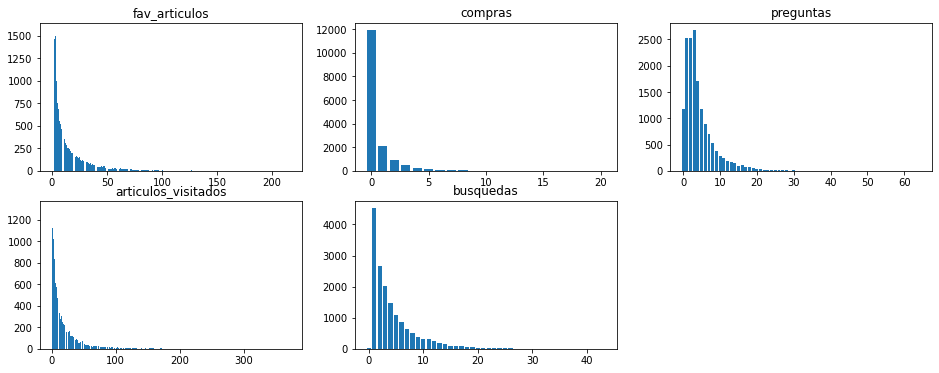

In [325]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,3,figsize=(16,6))
user_actions = ['fav_articulos','articulos_visitados','compras','busquedas','preguntas']

for i,ua in enumerate(user_actions):
    actions_qty = (df.groupby(ua)
                 .agg({'user_id':'count','abandona':'sum'})
                 .rename_axis(ua)
                 .reset_index())
    
    x = list(actions_qty[ua])
    y = list(actions_qty.user_id)
    
    pi = i % 2
    pj = int(i/2)
    axs[pi,pj].bar(x,y)
    axs[pi,pj].set_title(ua)
fig.delaxes(axs[1,2])

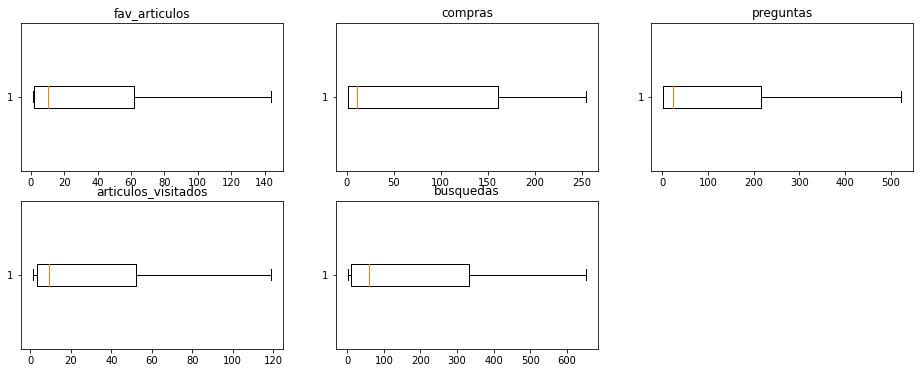

In [326]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,3,figsize=(16,6))

for i,ua in enumerate(user_actions):
    actions_qty = (df.groupby(ua)
                 .agg({'user_id':'count','abandona':'sum'})
                 .rename_axis(ua)
                 .reset_index())
    
    x = list(actions_qty[ua])
    y = list(actions_qty.user_id)
    
    pi = i % 2
    pj = int(i/2)
    axs[pi,pj].boxplot(y,vert=False, showfliers=False)
    axs[pi,pj].set_title(ua)
fig.delaxes(axs[1,2])


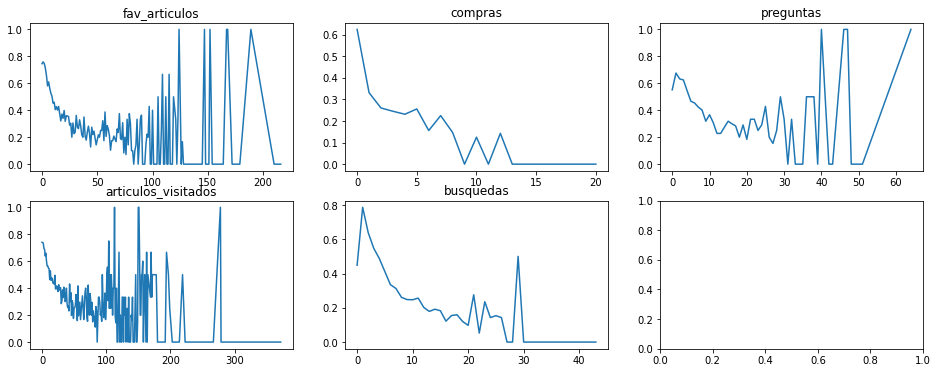

In [327]:
fig, axs = plt.subplots(2,3,figsize=(16,6))

for i,ua in enumerate(user_actions):
    actions_qty = (df.groupby(ua)
                 .agg({'user_id':'count','abandona':'sum'})
                 .rename_axis(ua)
                 .reset_index())
    
    x = list(actions_qty[ua])
    y = list(actions_qty.abandona/actions_qty.user_id)
    
    pi = i % 2
    pj = int(i/2)
    axs[pi,pj].plot(x,y)
    axs[pi,pj].set_title(ua)

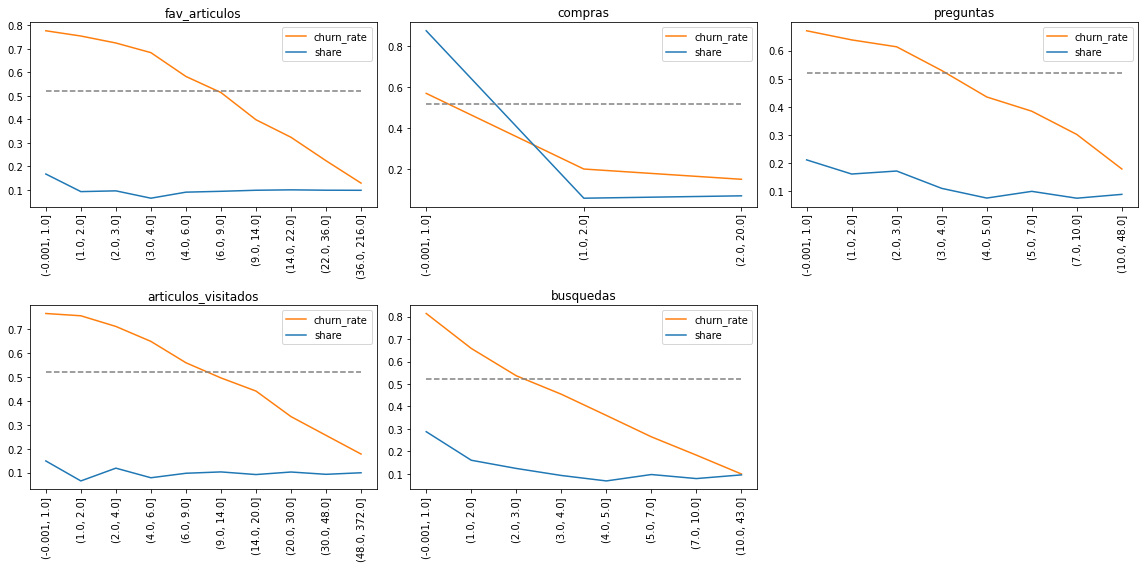

In [328]:
import numpy as np
fig, axs = plt.subplots(2,3,figsize=(16,8), tight_layout=True)
#plt.subplots(hspace=1)

for i,ua in enumerate(user_actions):
    dfm['b_'+ua] = pd.qcut(dfm[ua], 10, duplicates='drop')

    actions_qty = (dfm.groupby('b_'+ua)
                 .agg({'user_id':'count','abandona':'sum'})
                 .rename_axis(ua)
                 .reset_index())
    x = np.arange(len(actions_qty[ua]))
    y1 = list(actions_qty.abandona/actions_qty.user_id)
    y2 = list(actions_qty.user_id/actions_qty.user_id.sum())
    
    pi = i % 2
    pj = int(i/2)

    axs[pi,pj].plot(x,y1, color='tab:orange',label='churn_rate')
    axs[pi,pj].plot(x,y2, color='tab:blue',label='share')
    axs[pi,pj].set_title(ua)
    axs[pi,pj].set_xticks(x)
    axs[pi,pj].set_xticklabels(actions_qty[ua],rotation=90)
    axs[pi,pj].legend()
    axs[pi,pj].plot([0,len(x)-1],[0.52,0.52],'r--',color='gray')
fig.delaxes(axs[1,2])

In [329]:
## K-means bucketizing

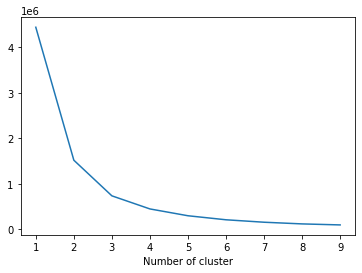

In [330]:
from sklearn.cluster import KMeans

sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=500).fit(dfm[['fav_articulos']])
    dfm['kevent1'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [331]:
from utils.utils import group_by_with_main_metrics
kmeans = KMeans(n_clusters=3, max_iter=100).fit(dfm[['fav_articulos']])
dfm['k_fav_articulos'] = kmeans.labels_
gb = group_by_with_main_metrics(dfm, 'k_fav_articulos', 'user_id', 'abandona')

gb['min'] = -1
gb['max'] = -1
for k in gb.k_fav_articulos:
    gb.loc[gb.k_fav_articulos==k,'min'] = dfm[dfm['k_fav_articulos']==k].fav_articulos.min()
    gb.loc[gb.k_fav_articulos==k,'max'] = dfm[dfm['k_fav_articulos']==k].fav_articulos.max()
gb.sort_values(by='min')

,k_fav_articulos,user_id,abandona,share,target_rate,min,max
0,0,9187,5709,0.759633,0.621422,0,18
1,1,2327,525,0.192409,0.225612,19,54
2,2,580,64,0.047958,0.110345,55,216


# Sexo

In [332]:
dfm.groupby('sexo').user_id.count()

sexo
femenino     6521
masculino    5465
unknown       108
Name: user_id, dtype: int64

In [333]:
g_qty = (dfm.groupby('sexo')
             .agg({'user_id':'count','abandona':'sum'})
             .rename_axis('g_qty')
             .reset_index())
g_qty['ratio'] = g_qty['abandona']/g_qty['user_id']
g_qty

,g_qty,user_id,abandona,ratio
0,femenino,6521,3279,0.502837
1,masculino,5465,2968,0.543092
2,unknown,108,51,0.472222


# Provincia

In [334]:
dfm.provincia = dfm.provincia.fillna('SIN_PROVINCIA')

In [335]:
cr_qty = (dfm.groupby("provincia")
             .agg({'user_id':'count','abandona':'sum'})
             .rename_axis('provincia')
             .reset_index())
cr_qty['ratio'] = cr_qty['abandona']/cr_qty['user_id']
cr_qty

,provincia,user_id,abandona,ratio
0,Buenos Aires,4999,2718,0.543709
1,Buenos Aires F.D.,2194,1094,0.498633
2,Catamarca,115,60,0.521739
3,Chaco,318,165,0.518868
4,Cordoba,1527,716,0.468893
5,Córdoba,1,0,0.000000
6,Formosa,173,98,0.566474
7,Jujuy,150,93,0.620000
8,La Pampa,136,58,0.426471
9,Neuquen,212,101,0.476415


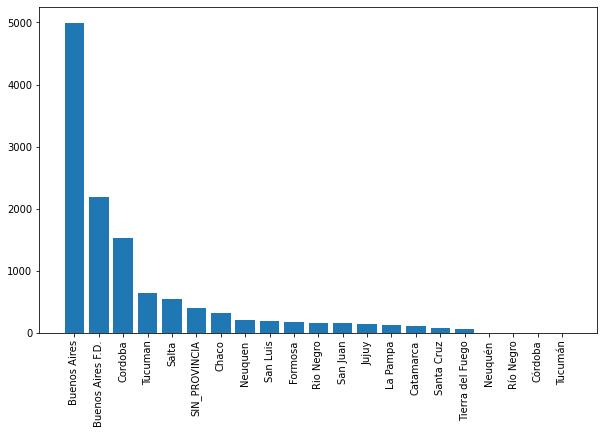

In [336]:
cr_qty = (dfm.groupby("provincia")
             .agg({'user_id':'count','abandona':'sum'})
             .rename_axis('provincia')
             .reset_index())

cq = cr_qty.sort_values(by='user_id',ascending=False)

x = cq.provincia
y = cq.user_id

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, y)
ax.set_xticklabels(cq.provincia,rotation=90)
plt.show()

In [212]:
dfm.loc[dfm.provincia == 'Neuquén', 'provincia'] = 'Neuquen'
dfm.loc[dfm.provincia == 'Córdoba', 'provincia'] = 'Cordoba'
dfm.loc[dfm.provincia == 'Tucumán', 'provincia'] = 'Tucuman'
dfm.loc[dfm.provincia == 'Río Negro', 'provincia'] = 'Rio Negro'

In [213]:
print(len(dfm.provincia.unique()))
dfm.provincia.unique()

17


array(['Santa Cruz', 'Buenos Aires', 'Cordoba', 'Buenos Aires F.D.',
       'Salta', 'Neuquen', 'La Pampa', 'Jujuy', 'Chaco', 'SIN_PROVINCIA',
       'Tucuman', 'Formosa', 'San Juan', 'Tierra del Fuego', 'San Luis',
       'Rio Negro', 'Catamarca'], dtype=object)

In [227]:
regions = {'high':['SIN_PROVINCIA','Jujuy','Formosa'],
          'mid':['Buenos Aires','Catamarca','Chaco','Tucuman','Rio Negro','San Juan','La Rioja','Buenos Aires F.D.','Salta'],
          'mid_low':['Cordoba','Neuquen','San Luis'],
          'low':['Neuquen','La Pampa','Tierra del Fuego','Santa Cruz']}
dfm['group'] = dfm['provincia']
for group,provinces in regions.items():
    for p in provinces:
        dfm.loc[dfm.group == p, 'group'] = group

In [270]:
cols = ['provincia']#,'age_lesseq_17']
cr = (dfm.groupby(cols).agg({'user_id':'count','abandona':'sum'})
  .rename_axis(cols)
  .reset_index())
cr['ratio'] = cr['abandona']/cr['user_id']
cr = cr.sort_values(by=['ratio'],ascending=False)
cr

,provincia,user_id,abandona,ratio
10,SIN_PROVINCIA,398,262,0.658291
6,Jujuy,150,93,0.620000
5,Formosa,173,98,0.566474
0,Buenos Aires,4999,2718,0.543709
16,Tucuman,642,340,0.529595
2,Catamarca,115,60,0.521739
3,Chaco,318,165,0.518868
9,Rio Negro,167,86,0.514970
1,Buenos Aires F.D.,2194,1094,0.498633
11,Salta,558,275,0.492832


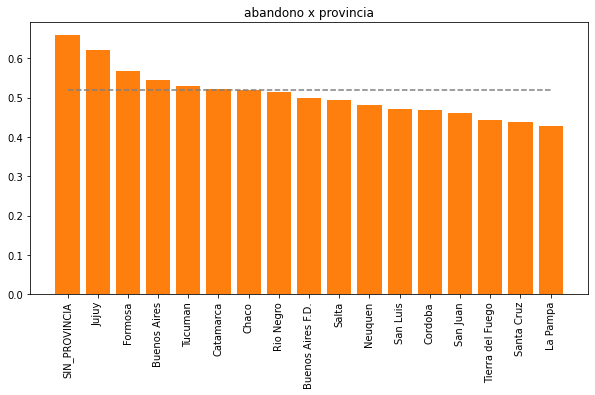

In [271]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))

r_qty = cr
r_qty['rate'] = r_qty.abandona/r_qty.user_id
r_qty['share'] = r_qty.user_id/r_qty.user_id.sum()

x = list(r_qty.provincia)
y = list(r_qty.rate)

ax.bar(x,y,color='tab:orange')
ax.set_title('abandono x provincia')
ax.set_xticklabels(r_qty.provincia,rotation=90)
ax.plot([0,len(x)-1],[0.52,0.52],'r--', color='gray')

plt.show()

In [230]:
cols = ['group']#,'age_lesseq_17']
cr = (dfm.groupby(cols).agg({'user_id':'count','abandona':'sum'})
  .rename_axis(cols)
  .reset_index())
cr['ratio'] = cr['abandona']/cr['user_id']
cr = cr.sort_values(by=['ratio'],ascending=False)

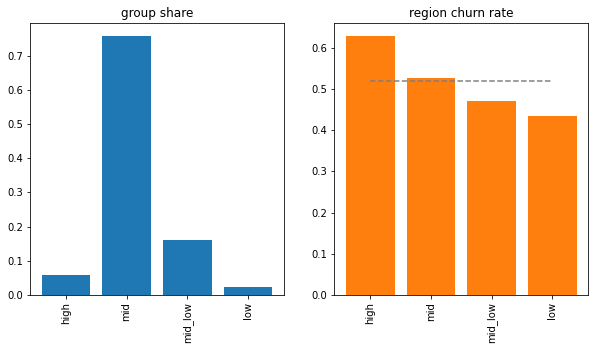

In [268]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(10,5))

r_qty = cr
r_qty['rate'] = r_qty.abandona/r_qty.user_id
r_qty['share'] = r_qty.user_id/r_qty.user_id.sum()

x = list(r_qty.group)
y1 = list(r_qty.share)
y2 = list(r_qty.rate)

ax[0].bar(x,y1,color='tab:blue')
ax[0].set_title('group share')
ax[0].set_xticklabels(r_qty.group,rotation=90)

ax[1].bar(x,y2,color='tab:orange')
ax[1].set_title('region churn rate')
ax[1].set_xticklabels(r_qty.group,rotation=90)
ax[1].plot([0,len(x)-1],[0.52,0.52],'r--', color='gray')

plt.show()

# Ciudad

In [234]:
city = (dfm.groupby("localidad")
              .agg({'user_id':'count','abandona':'sum'})
              .rename_axis('gb')
              .reset_index())
city['rate'] = city['abandona']/city['user_id']

city[city.user_id >= 70].sort_values(by='rate',ascending=True)

,gb,user_id,abandona,rate
421,San Juan,140,61,0.435714
423,San Luis,141,64,0.453901
34,Bahía Blanca,80,38,0.475000
130,Córdoba,963,462,0.479751
295,Mar del Plata,150,72,0.480000
414,San Fernando del Valle de Catamarca,70,34,0.485714
59,Buenos Aires,1861,918,0.493283
399,Salta,489,243,0.496933
413,San Fernando,101,51,0.504950
241,La Plata,204,104,0.509804


In [339]:
len(dfm.localidad.unique())

519

<BarContainer object of 22 artists>

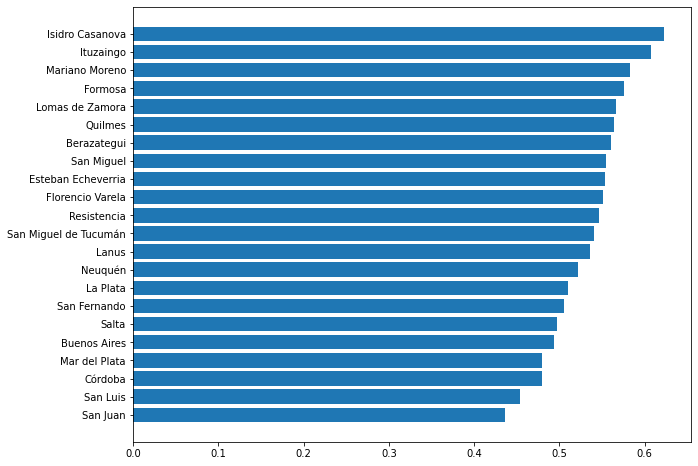

In [235]:
cq = city[city.user_id >= 100].sort_values(by='rate',ascending=True)

x = cq.gb
y = cq.rate

fig, ax = plt.subplots(figsize=(10,8))
ax.barh(x, y)

In [238]:
city_encodings = {'g53':['San Luis','Mar del Plata','San Juan'],
'g55': ['Salta','Bahía Blanca','Buenos Aires','Córdoba','San Justo','Neuquén','Villa Angelica','Paraná','La Plata','Floresta','Posadas','La Rioja','San Fernando del Valle de Catamarca','Mendoza','San Fernando','Pilar','Esteban Echeverria','Florencio Varela','Lanus','San Miguel de Tucumán'],
'g60':['Santiago del Estero','Wilde','Turdera','Santa Fe','Quilmes','San Miguel','Corrientes','Berazategui','Mariano Moreno','Resistencia','Lomas de Zamora','Burzaco','Formosa','Isidro Casanova'],
'g65':['Villa Ballester','Ituzaingo','Laferrere','San Salvador de Jujuy','Merlo','Godoy Cruz']}
dfm['city_encoded'] = 'unknown'
for encode,cities in city_encodings.items():
    for c in cities:
        dfm.loc[dfm.localidad == c, 'city_encoded'] = encode
dfm.head(5).city_encoded

0    unknown
3        g55
4    unknown
6    unknown
7    unknown
Name: city_encoded, dtype: object

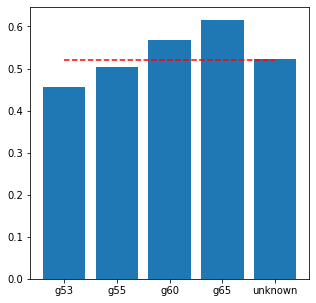

In [267]:
city = (dfm.groupby("city_encoded")
              .agg({'user_id':'count','abandona':'sum'})
              .rename_axis('gb')
              .reset_index())
city['rate'] = city['abandona']/city['user_id']
city['share'] = city.user_id/city.user_id.sum()
x = city.gb
y = city.rate

fig, ax = plt.subplots(figsize=(5,5))
ax.bar(x, y)
ax.plot([0,len(x)-1],[0.52,0.52],'r--', color='red')

<BarContainer object of 5 artists>

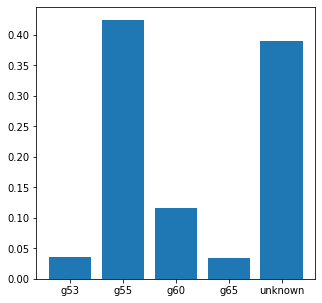

In [266]:
city = (dfm.groupby("city_encoded")
              .agg({'user_id':'count','abandona':'sum'})
              .rename_axis('gb')
              .reset_index())
city['rate'] = city['abandona']/city['user_id']
city['share'] = city.user_id/city.user_id.sum()
x = city.gb
y = city.share

fig, ax = plt.subplots(figsize=(5,5))
ax.bar(x, y)

# Hora de instalación

In [245]:
dfm['install_hour'] = dfm.fecha_de_instalacion.dt.strftime('%H')
cols = ['install_hour']
install_hour = (dfm.groupby(cols)
                   .agg({'user_id':'count','abandona':'sum'})
                   .rename_axis(cols)
                   .reset_index())
install_hour['rate'] = 100.0 * install_hour['abandona']/install_hour['user_id']
install_hour['share'] = 100.0 * install_hour.user_id/install_hour.user_id.sum()
install_hour[install_hour['share']>1].sort_values(by='rate',ascending=False)

,install_hour,user_id,abandona,rate,share
6,06,196,110,56.122449,1.620638
19,19,701,386,55.064194,5.796263
18,18,689,379,55.007257,5.697040
11,11,139,76,54.676259,1.149330
15,15,478,261,54.602510,3.952373
20,20,604,328,54.304636,4.994212
14,14,370,200,54.054054,3.059368
23,23,851,458,53.819036,7.036547
13,13,290,156,53.793103,2.397883
16,16,610,325,53.278689,5.043823


# Historico de instalaciones por ciudad

In [247]:
dfm_simple = dfm[['user_id','fecha_de_instalacion','localidad']]
dfm_simple.set_index('fecha_de_instalacion')

,user_id,localidad
fecha_de_instalacion,,
2019-04-30 19:29:34,eb762ec824879652ef2cb69efde14017,Río Gallegos
2019-04-29 06:00:57,93ecb31820c022f12390064218fc57b8,Florencio Varela
2019-04-30 21:43:22,0d75650b8934909f48f0e27622803bf0,NaN
2019-05-03 18:48:36,f19ae5a333252dcea0d8687c485e0f31,Moron
2019-04-28 15:48:33,1ab6982751c0db6e19430ae589fa7671,Mariano Acosta
...,...,...
2019-05-02 15:20:03,8154ce510c0eb08ad814ad6a82b9a19a,Buenos Aires
2019-05-01 11:33:12,7336d5151660e79839512a551d163cd3,Buenos Aires
2019-05-01 18:55:09,598f5445c9ec2fe005ce08643681611a,Caleta Olivia


In [250]:
dfm_hist_inst = sqldf("""
select df.user_id, dfp.user_id puser_id from dfm_simple df
inner join dfm_simple dfp on 
    df.localidad = dfp.localidad and 
    df.fecha_de_instalacion >= dfp.fecha_de_instalacion and 
    (df.fecha_de_instalacion - dfp.fecha_de_instalacion) < 1 and 
    df.user_id<>dfp.user_id
""")

In [251]:
hist_inst = dfm_hist_inst.groupby('user_id').puser_id.count().to_frame()
hist_inst.rename_axis('user_id')

,puser_id
user_id,
0000a9150329837f1167c257077739e6,16
0005b3ec4f76137a55ab6e7989ca2388,12
0007a0a870c63030167e36f48c54e562,3
0015c78fc6afa05e48a9a17b67e2945b,2
00179a96c1821dccdc90d4a17df3affe,148
...,...
ffd60790e0dd98154992eff37e1063c5,1432
ffd85d715bec9e9ea7df8c87c6646be7,5
ffdc4d0e8b01454ee74c06ecf11d76af,290


In [252]:
dfm = pd.merge(dfm,hist_inst,on='user_id',how='left')
dfm.head(3)

,user_id,fecha_de_instalacion,plataforma,fav_articulos,articulos_visitados,compras,busquedas,preguntas,sexo,edad,...,b_articulos_visitados,b_compras,b_busquedas,b_preguntas,kevent1,k_fav_articulos,group,city_encoded,install_hour,puser_id
0,eb762ec824879652ef2cb69efde14017,2019-04-30 19:29:34,Android,1,2,0,1,1,masculino,17,...,"(1.0, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]",0,1,low,unknown,19,17.0
1,93ecb31820c022f12390064218fc57b8,2019-04-29 06:00:57,Android,35,46,4,10,12,masculino,20,...,"(30.0, 48.0]","(2.0, 20.0]","(7.0, 10.0]","(10.0, 48.0]",8,0,mid,g55,06,58.0
2,0d75650b8934909f48f0e27622803bf0,2019-04-30 21:43:22,Android,1,0,0,1,1,femenino,17,...,"(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]",0,1,mid_low,unknown,21,NaN


In [259]:
dfm['puser_id'] = dfm.puser_id.fillna(0)

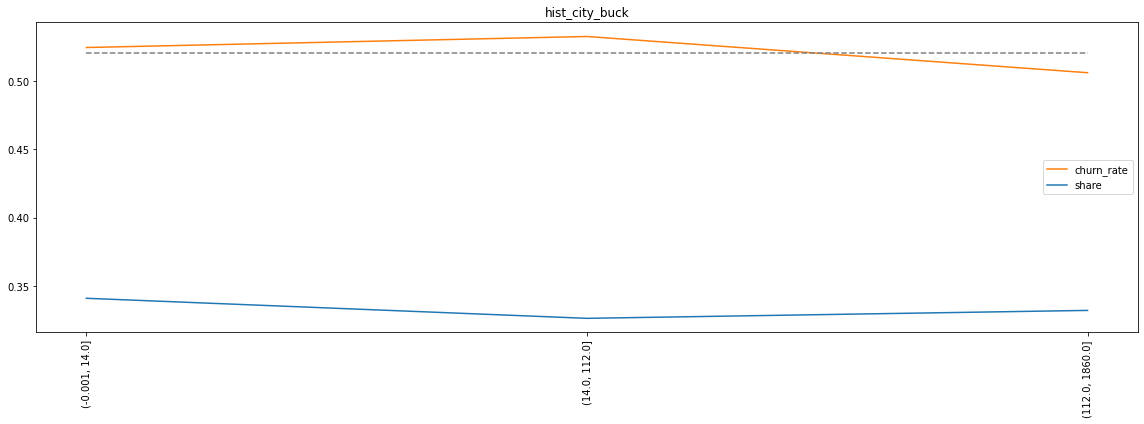

In [261]:
fig, ax = plt.subplots(figsize=(16,6), tight_layout=True)



dfm['cc'] = pd.qcut(dfm['puser_id'],3,duplicates='drop')

c_qty = (dfm.groupby('cc')
             .agg({'user_id':'count','abandona':'sum'})
             .rename_axis('gb')
             .reset_index())
c_qty['rate'] = c_qty.abandona/c_qty.user_id

x = np.arange(len(c_qty.gb))
y1 = list(c_qty.rate)
y2 = list(c_qty.user_id/c_qty.user_id.sum())

ax.plot(x,y1, color='tab:orange',label='churn_rate')
ax.plot(x,y2, color='tab:blue',label='share')
ax.set_title('hist_city_buck')
ax.set_xticks(x)
ax.set_xticklabels(c_qty.gb, rotation=90)
ax.plot([0,len(x)-1],[0.52,0.52],'r--', color='gray')
ax.legend()

In [262]:
dfm['puser_id'] = dfm.puser_id.fillna(0)
dfm['cc'] = pd.cut(dfm['puser_id'],bins=[0,1,304,2045],duplicates='drop')

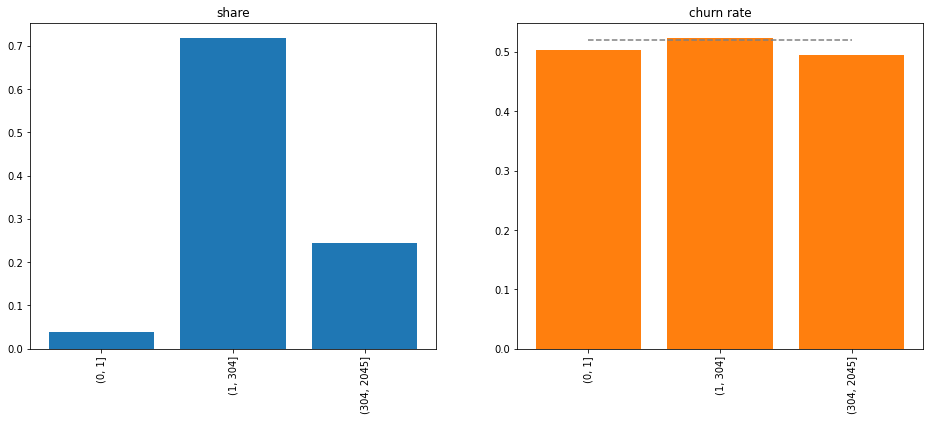

In [263]:
c_qty = (dfm.groupby('cc')
             .agg({'user_id':'count','abandona':'sum'})
             .rename_axis('gb')
             .reset_index())
c_qty['rate'] = c_qty.abandona/c_qty.user_id
c_qty['share'] = c_qty.user_id/c_qty.user_id.sum()

fig, ax = plt.subplots(1,2,figsize=(16,6))

x = np.arange(len(c_qty.gb))
y1 = list(c_qty.share)
y2 = list(c_qty.rate)

ax[0].bar(x,y1,color='tab:blue')
ax[0].set_title('share')
ax[0].set_xticks(x)
ax[0].set_xticklabels(c_qty.gb,rotation=90)

ax[1].bar(x,y2,color='tab:orange')
ax[1].set_title('churn rate')
ax[1].set_xticks(x)
ax[1].set_xticklabels(c_qty.gb,rotation=90)
ax[1].plot([0,len(x)-1],[0.52,0.52],'r--', color='gray')

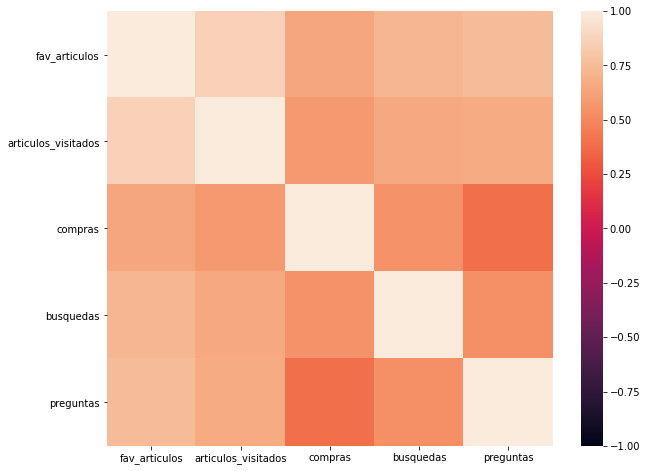

In [276]:
import seaborn as sns
data = dfm[['fav_articulos','articulos_visitados','compras','busquedas','preguntas','sexo']]
plt.figure(figsize=(10,8))
corr = data.corr(method='spearman')
sns.heatmap(corr, 
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values,vmin=-1, vmax=1)

In [277]:
dfm.columns

Index(['user_id', 'fecha_de_instalacion', 'plataforma', 'fav_articulos',
       'articulos_visitados', 'compras', 'busquedas', 'preguntas', 'sexo',
       'edad', 'provincia', 'localidad', 'abandona', 'day', 'age_lesseq_20',
       'b_fav_articulos', 'b_articulos_visitados', 'b_compras', 'b_busquedas',
       'b_preguntas', 'kevent1', 'k_fav_articulos', 'group', 'city_encoded',
       'install_hour', 'puser_id', 'cc'],
      dtype='object')

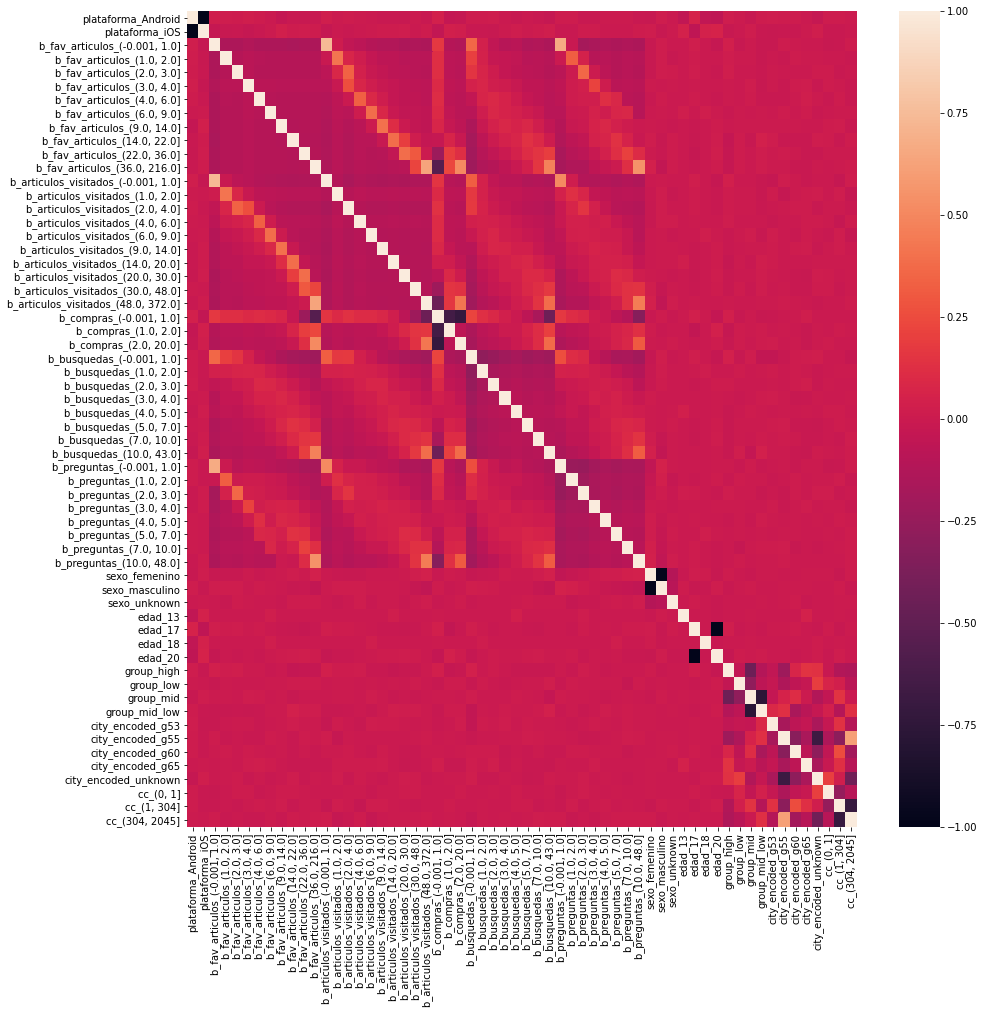

In [288]:
dummies = ['plataforma','b_fav_articulos','b_articulos_visitados','b_compras','b_busquedas','b_preguntas','sexo','edad','group','city_encoded','cc']
data = pd.get_dummies(data=dfm[dummies],columns=dummies)

plt.figure(figsize=(15,15))
corr = data.corr(method='spearman')#data[['event_1','event_2','event_3','event_4','event_5']].corr()
sns.heatmap(corr, 
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values,vmin=-1, vmax=1)

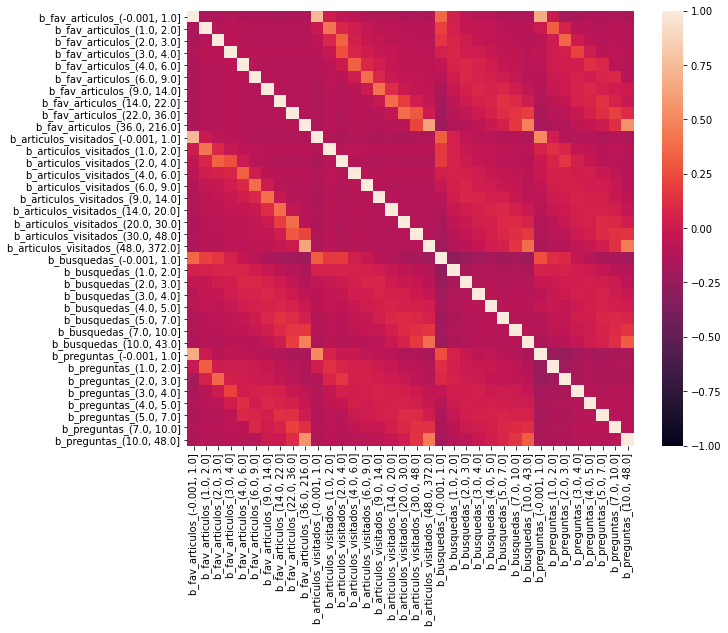

In [296]:
dummies = ['b_fav_articulos','b_articulos_visitados','b_busquedas','b_preguntas']
data = pd.get_dummies(data=dfm[dummies],columns=dummies)

plt.figure(figsize=(10,8))
corr = data.corr(method='spearman')#data[['event_1','event_2','event_3','event_4','event_5']].corr()
sns.heatmap(corr, 
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values,vmin=-1, vmax=1)

In [302]:
from sklearn import decomposition

data = dfm[['fav_articulos','articulos_visitados','compras','busquedas','preguntas']]

pca = decomposition.PCA(n_components=5)
pc = pca.fit_transform(data)
pc_df = pd.DataFrame(data = pc ,columns = ['PC1', 'PC2','PC3','PC4','PC5'])
pc_df

,PC1,PC2,PC3,PC4,PC5
0,-21.756541,1.857337,-0.512282,-1.737835,0.058909
1,35.114436,-4.037721,0.215174,4.101120,2.572399
2,-23.422257,0.750902,-0.501281,-1.705438,0.063387
3,-18.197346,0.155923,-0.804144,-0.205803,-0.011904
4,-19.553632,2.148395,-0.565446,-1.975916,0.004420
...,...,...,...,...,...
12089,75.069855,-17.669537,-2.087387,-10.587476,-3.484123
12090,-22.502160,1.195556,0.352129,-1.230272,0.023249
12091,34.344361,-4.919686,-0.443856,-3.200118,-0.727105
12092,-18.821778,1.079864,-1.620892,-0.491483,0.076006


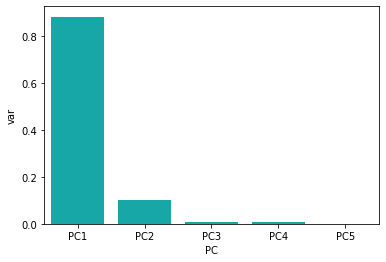

In [303]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

In [306]:
pca.explained_variance_ratio_

array([8.81538392e-01, 1.01464961e-01, 8.35274737e-03, 7.97202813e-03,
       6.71871438e-04])